<h1 align='center'> Monte-Carlo (MCMC) - TP6 (Homework due April 28 23h59) </h1>
<h4 align='right'><i> author: Hicham Janati </i></h4>


In [ ]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

## I - Metropolis-Hastings vs Rejection sampling
We would like to sample from the density function:
$$ f(x) \propto  x^4\exp(- x^2) $$
Using the proposal: $g(x) \propto \exp(- \frac{1}{2} x^2) $.

1. Find an empirical bound M so as to apply rejection sampling using g to sample from f and visualize the domination of f by Mg.

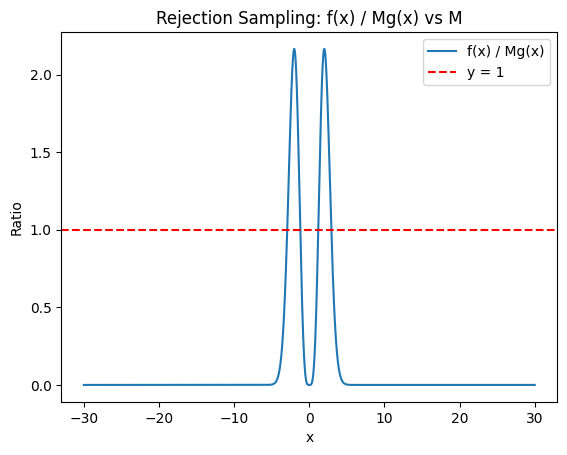

The value of M is: 2.1653614136629353


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions
f = lambda x: np.exp(- x ** 2) * x ** 4
g = lambda x: np.exp(- 0.5 * x ** 2)

# Define the domain
x = np.linspace(-30, 30, 10000)

# Find the maximum ratio f(x)/g(x)
ratio = f(x) / g(x)
M = np.max(ratio)

# Visualize the ratio f(x)/Mg(x) and the value of M
plt.plot(x, ratio, label='f(x) / Mg(x)')
plt.axhline(y=1, color='r', linestyle='--', label='y = 1')
plt.xlabel('x')
plt.ylabel('Ratio')
plt.title('Rejection Sampling: f(x) / Mg(x) vs M')
plt.legend()
plt.show()

print("The value of M is:", M)


2. Implement the rejection sampling algorithm and visualize the empirical histogram against the density f. Use scipy.integration to estimate the normalizing constant of f for accurate visualization of the density.

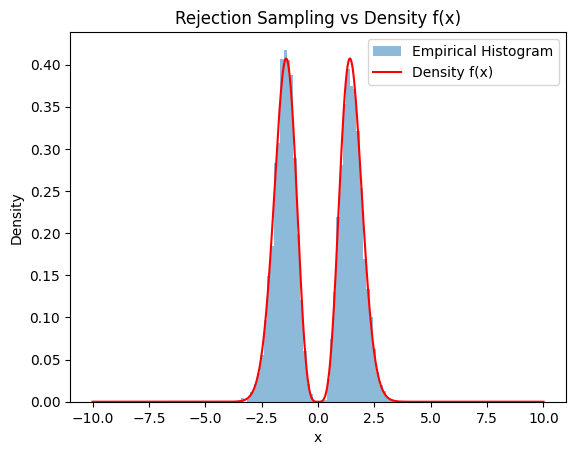

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define the functions
f_unnormalized = lambda x: np.exp(- x ** 2) * x ** 4
g = lambda x: np.exp(- 0.5 * x ** 2)

# Find the normalizing constant of f
normalizing_constant, _ = quad(f_unnormalized, -np.inf, np.inf)

# Define the normalized version of f
f = lambda x: f_unnormalized(x) / normalizing_constant

# Rejection Sampling Algorithm
def rejection_sampling(n_samples):
  """Reject sampling algorithm for f with Gaussian proposal g."""
  samples = []
  while len(samples) < n_samples:
      x_sample = np.random.normal(0, 1)  # Generate sample from g(x)
      u = np.random.uniform(0, M * g(x_sample))  # Generate uniform sample for acceptance
      if u <= f(x_sample):  # Acceptance criterion
            samples.append(x_sample)
  return np.array(samples)

# Generate samples using rejection sampling
n_samples = 10000
samples = rejection_sampling(n_samples)

# Visualize the empirical histogram against the density f
plt.hist(samples, bins=50, density=True, alpha=0.5, label='Empirical Histogram')
plt.plot(x, f(x), color='red', label='Density f(x)')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Rejection Sampling vs Density f(x)')
plt.legend()
plt.show()


3. Implement the random walk metropolis hastings algorithm with a Gaussian conditional probability and visualize the empirical histogram against the normalized density f/F

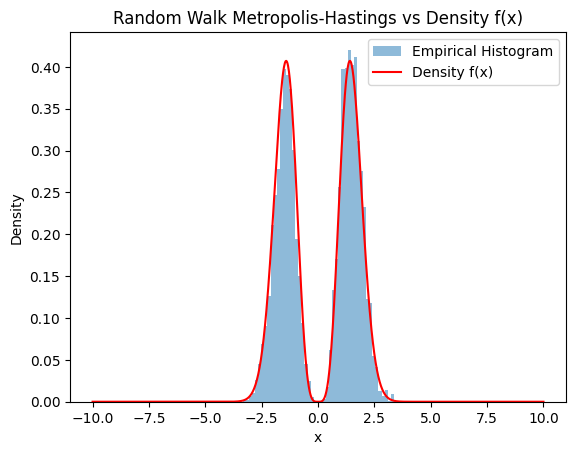

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def rw_metropolis_hastings(n, f, seed=None):
    """Random walk Metropolis-Hastings algorithm for f with Gaussian proposal g.
    n: int.
        number of samples.
    f: callable.
        density we want to sample from.
    seed: int (optional).
        random seed initialization.
    """
    np.random.seed(seed)
    samples = []
    current_sample = np.random.normal(0, 1)  # Initial sample
    for _ in range(n):
        # Propose a new sample from a Gaussian distribution centered at the current sample
        proposed_sample = np.random.normal(current_sample, 1)

        # Calculate acceptance ratio
        acceptance_ratio = f(proposed_sample) / f(current_sample)

        # Accept the new sample with probability min(1, acceptance_ratio)
        if np.random.rand() < min(1, acceptance_ratio):
            samples.append(proposed_sample)
            current_sample = proposed_sample
        else:
            samples.append(current_sample)

    return np.array(samples)

# Normalized version of f
f_unnormalized = lambda x: np.exp(- x ** 2) * x ** 4
normalizing_constant, _ = quad(f_unnormalized, -np.inf, np.inf)
f = lambda x: f_unnormalized(x) / normalizing_constant

# Generate samples using the RWMH algorithm
n_samples = 10000
samples = rw_metropolis_hastings(n_samples, f)

# Visualize the empirical histogram against the normalized density f/F
plt.hist(samples, bins=50, density=True, alpha=0.5, label='Empirical Histogram')
x = np.linspace(-10, 10, 1000)
plt.plot(x, f(x), color='red', label='Density f(x)')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Random Walk Metropolis-Hastings vs Density f(x)')
plt.legend()
plt.show()


# II - Gibbs sampling
Gibbs sampling is a Markov Chain sampling algorithm used to sample from a multivariate random variable by sampling each component from its conditional distribution while the others components are fixed.

We would like to sample from a multivariate Gaussian $(X_1, X_2)$ with density:
$$p(x_1, x_2) = \frac{1}{2\pi\sqrt{1 - \rho^2}} \exp\left(- \frac{1}{2(1 - \rho^2)}(x_1^2 + x_2^2 - 2\rho x_1 x_2)\right) $$
*1. Identify the parameters of the distribution and compute the conditional distributions of each component.*

Dans la distribution gaussienne multivariée $ p(x_1, x_2) $, les paramètres sont :

- Vecteur moyen : $ \mu = (0, 0) $ (en supposant une moyenne nulle)
- Matrice de covariance : $ \Sigma = \begin{pmatrix} 1 & \rho \\ \rho & 1 \end{pmatrix} $

Pour calculer les distributions conditionnelles de chaque composante $ X_1 $ et $ X_2 $, nous utilisons les propriétés des distributions gaussiennes multivariées :

1. La distribution conditionnelle de $ X_1 $ sachant $ X_2 = x_2 $ suit une distribution gaussienne avec une moyenne $ \mu_1 + \Sigma_{12}\Sigma_{22}^{-1}(x_2 - \mu_2) $ et une covariance $ \Sigma_{11} - \Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21} $.

2. La distribution conditionnelle de $ X_2 $ sachant $ X_1 = x_1 $ suit une distribution gaussienne avec une moyenne $ \mu_2 + \Sigma_{21}\Sigma_{11}^{-1}(x_1 - \mu_1) $ et une covariance $ \Sigma_{22} - \Sigma_{21}\Sigma_{11}^{-1}\Sigma_{12} $.

Avec les paramètres de la distribution et ces propriétés, nous pouvons dériver les distributions conditionnelles de $ X_1 $ et $ X_2 $. Calculons-les :

1. Distribution conditionnelle de $ X_1 $ sachant $ X_2 = x_2 $ :


\begin{align*}
\mu_{1|2} &= \mu_1 + \rho\frac{\sigma_1}{\sigma_2}(x_2 - \mu_2) \\
&= 0 + \rho\frac{1}{1}(x_2 - 0) \\
&= \rho x_2
\end{align*}

\begin{align*}
\sigma_{1|2}^2 &= \sigma_1^2 - \rho^2\left(\frac{\sigma_1^2}{\sigma_2^2}\right) \\
&= 1 - \rho^2
\end{align*}


Ainsi, la distribution conditionnelle de $ X_1 $ sachant $ X_2 = x_2 $ est une distribution gaussienne avec une moyenne $ \rho x_2 $ et une variance $ 1 - \rho^2 $.

2. Distribution conditionnelle de $ X_2 $ sachant $ X_1 = x_1 $ :

De manière similaire,


\begin{align*}
\mu_{2|1} &= \mu_2 + \rho\frac{\sigma_2}{\sigma_1}(x_1 - \mu_1) \\
&= 0 + \rho\frac{1}{1}(x_1 - 0) \\
&= \rho x_1
\end{align*}

\begin{align*}
\sigma_{2|1}^2 &= \sigma_2^2 - \rho^2\left(\frac{\sigma_2^2}{\sigma_1^2}\right) \\
&= 1 - \rho^2
\end{align*}


Ainsi, la distribution conditionnelle de $ X_2 $ sachant $ X_1 = x_1 $ est également une distribution gaussienne avec une moyenne $ \rho x_1 $ et une variance $ 1 - \rho^2 $.


*2. Implement the associated Gibbs sampler where each $X_1, X_2$ are sampled sequentially from the conditional distributions.*

In [ ]:
import numpy as np

def conditional_mean_and_variance(rho, x_fixed, sigma_squared=1):
    """Compute the conditional mean and variance for Gibbs sampling."""
    conditional_mean = rho * x_fixed
    conditional_variance = sigma_squared * (1 - rho ** 2)
    return conditional_mean, conditional_variance

def gibbs_sampler(iterations, initial_values, rho):
    """Gibbs sampler for sampling from a bivariate Gaussian distribution."""
    # Initialize variables
    x_1, x_2 = initial_values
    samples = []

    for _ in range(iterations):
        # Sample x_1 from the conditional distribution given x_2
        mean_1, variance_1 = conditional_mean_and_variance(rho, x_2)
        x_1 = np.random.normal(mean_1, np.sqrt(variance_1))

        # Sample x_2 from the conditional distribution given x_1
        mean_2, variance_2 = conditional_mean_and_variance(rho, x_1)
        x_2 = np.random.normal(mean_2, np.sqrt(variance_2))

        # Append the samples
        samples.append((x_1, x_2))

    return np.array(samples)

# Test the Gibbs sampler
iterations = 10000
initial_values = (0, 0)
rho = 0.5
samples = gibbs_sampler(iterations, initial_values, rho)

# Print the first few samples
print("First few samples:")
print(samples[:5])

# Print the mean and covariance of the samples
print("\nMean of samples:")
print(np.mean(samples, axis=0))
print("\nCovariance matrix of samples:")
print(np.cov(samples, rowvar=False))


First few samples:
[[-0.31179491 -0.05795059]
 [-1.86423151 -0.51008393]
 [-1.40142757 -0.67072539]
 [-1.44641123 -0.68931935]
 [-0.87278499  0.86411564]]

Mean of samples:
[0.00064421 0.00952034]

Covariance matrix of samples:
[[0.98407069 0.48774075]
 [0.48774075 0.98695711]]


3. Visualize the contour plots of the target distribution and that of the Gibbs Sampler for different values of n. How does it behave with $\rho$ ?

First the target density:

In [ ]:
from scipy.stats import multivariate_normal
rho = 0.5
S = np.array([[1, rho], [rho, 1]])
grid = np.linspace(-3, 3, 1000)
x, y = np.meshgrid(grid, grid)
pos = np.empty((1000, 1000, 2))
pos[:, :, 0] = x
pos[:, :, 1] = y
Z_true = multivariate_normal.pdf(pos, mean=[0, 0], cov=S)
plt.figure(figsize=(4, 4))
plt.contour(x, y, Z_true, levels=np.logspace(-2, 0., 20) * Z_true.max())
plt.title("True contour plots")
plt.show()

Now we plot the contour plots as the Markov chain moves. Keep in mind that the Markov chain samples are correlated and therefore not iid ! We need to wait a whiler until the MC reaches the stationary distribution. We show this in the following plots:
First we plot everything till a certain iteration:

4. Using the numpy corrcoef function, plot the auto-correlation values as a function of the lag: $corr(X_t, X_{t - lag})$

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

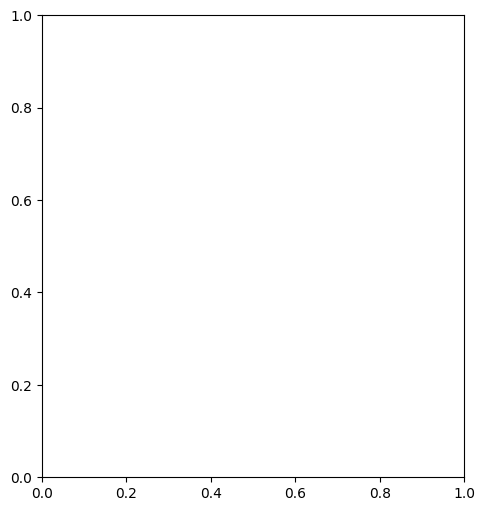

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def conditional_mean_and_variance(rho, x_fixed, sigma_squared=1):
    """Compute the conditional mean and variance for Gibbs sampling."""
    conditional_mean = rho * x_fixed
    conditional_variance = sigma_squared * (1 - rho ** 2)
    return conditional_mean, conditional_variance

def gibbs_sampler(iterations, initial_values, rho):
    """Gibbs sampler for sampling from a bivariate Gaussian distribution."""
    # Initialize variables
    x_1, x_2 = initial_values
    samples = []

    for _ in range(iterations):
        # Sample x_1 from the conditional distribution given x_2
        mean_1, variance_1 = conditional_mean_and_variance(rho, x_2)
        x_1 = np.random.normal(mean_1, np.sqrt(variance_1))

        # Sample x_2 from the conditional distribution given x_1
        mean_2, variance_2 = conditional_mean_and_variance(rho, x_1)
        x_2 = np.random.normal(mean_2, np.sqrt(variance_2))

        # Append the samples
        samples.append((x_1, x_2))

    return np.array(samples)

# Set parameters
iterations = 10000
initial_values = (0, 0)
rho = 0.5
lag_range = 100

# Run Gibbs sampler
samples = gibbs_sampler(iterations, initial_values, rho)

# Plot contour plots as the Markov chain moves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
X1, X2 = samples[:1000, :, 0], samples[:1000, :, 1]
plt.contourf(X1, X2, cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Contour Plot of Markov Chain Movement (First 1000 Iterations)')

# Plot autocorrelation values as a function of lag
autocorrelation_values = [np.corrcoef(samples[:-lag, 0], samples[lag:, 0])[0, 1] for lag in range(1, lag_range)]
plt.subplot(1, 2, 2)
plt.plot(range(1, lag_range), autocorrelation_values)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of X1 as a Function of Lag')

plt.tight_layout()
plt.show()


5. Using what you observe, propose two arguments to add to your Gibbs sampler function to improve the simulation.
What happens when $\rho \to 1$ ?

6. Implement a Random Walk metropolis algorithm to simulate from p using a conditional proposal $\mathcal N(0, \tau I_2)$ and vary $\tau$.

In [ ]:
def rw_metropolis_hastings(n, f, tau=1., seed=None):
    """Random walk metropolis hastings algorithm for f with Gaussian proposal g."""